In [20]:
import sys
sys.path.append('/home/obesity')
import pandas as pd
import numpy as np
from bmi.snp_encoding_and_labeling import encode_snp_data_get_bmi_label
from bmi.customized_activation_function import CustomizedAct
from matplotlib import pyplot as plt
from bmi.model import create_dense_model, create_deep_dense_model,dense_block 
from bmi.plot import show_bmi_distribution,show_customized_act,show_predicting_distribution,show_predicting_result,show_training_history
import os
os.environ['CUDA_VISIBLE_DEVICES']= '3'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [19]:
import importlib
importlib.reload(sys.modules['bmi.snp_encoding_and_labeling'])

<module 'bmi.snp_encoding_and_labeling' from '/home/obesity/bmi/snp_encoding_and_labeling.py'>

In [176]:
# define path
train_data_path = '/home/obesity/snp_data/snp_data_0106/Train_Male_SNP_8167_#_6393.tsv'
valid_data_path = '/home/obesity/snp_data/snp_data_0106/Valid_Male_SNP_8167_#_711.tsv'
test_data_path = '/home/obesity/snp_data/snp_data_0106/Test_Male_SNP_8167_#_72.tsv'
train_bmi_data_path ='/home/obesity/input_data/ped_0106/0107_male_train_bin_pheno.txt'
test_bmi_data_path ='/home/obesity/input_data/ped_0106/0107_male_test_bin_pheno.txt'

In [177]:
train_data = pd.read_table(train_data_path)
valid_data = pd.read_table(valid_data_path)
test_data = pd.read_table(test_data_path)

In [178]:
train_array, train_labels = encode_snp_data_get_bmi_label(train_data, train_bmi_data_path, value_name='pheno')
valid_array, valid_labels = encode_snp_data_get_bmi_label(valid_data, train_bmi_data_path, value_name='pheno')

In [179]:
train_labels_binary = train_labels-1
valid_labels_binary = valid_labels-1

In [180]:
test_array, test_labels = encode_snp_data_get_bmi_label(test_data, test_bmi_data_path, value_name='pheno')

In [181]:
test_labels_binary = test_labels-1

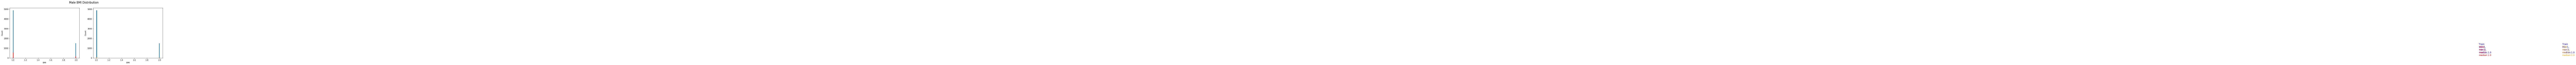

In [26]:
show_bmi_distribution(train_labels, valid_labels, test_labels, gender='Male')

In [10]:
import pandas as pd
round_trian_label = (np.round(np.array(train_labels))).astype(int)
df = pd.DataFrame.from_dict(round_trian_label)[0].value_counts()
weight_dict = (1/(df/sum(df))).to_dict()

In [11]:
sample_weight = np.array([weight_dict[int(round(val))] for val in round_trian_label])

In [132]:
sample_weight = len(sample_weight)*sample_weight/sum(sample_weight)

In [133]:
sample_weight.mean()

1.00000000000014

In [182]:
from tensorflow.keras import optimizers
from tensorflow.keras import callbacks
import tensorflow as tf
model = create_deep_dense_model(len(train_array[1]),activation= tf.keras.activations.sigmoid)
model.compile(optimizer = optimizers.Adam(lr=1e-3), loss='binary_crossentropy',metrics=['accuracy'])
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-5, verbose=1)
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=100, verbose=1)
history = model.fit(train_array, train_labels_binary,
                    #sample_weight=sample_weight,
                    validation_data=(np.array(valid_array), np.array(valid_labels_binary)),
                    batch_size= 32, epochs=500, verbose=1,
                    callbacks=[reduce_lr, early_stop])

Epoch 1/500
200/200 [==============================] - 5s 26ms/step - loss: 0.8231 - accuracy: 0.5716 - val_loss: 0.5724 - val_accuracy: 0.7764
Epoch 2/500
200/200 [==============================] - 5s 26ms/step - loss: 0.6490 - accuracy: 0.6876 - val_loss: 0.5409 - val_accuracy: 0.7764
Epoch 3/500
200/200 [==============================] - 5s 25ms/step - loss: 0.6136 - accuracy: 0.7269 - val_loss: 0.5376 - val_accuracy: 0.7764
Epoch 4/500
200/200 [==============================] - 5s 25ms/step - loss: 0.5886 - accuracy: 0.7410 - val_loss: 0.5377 - val_accuracy: 0.7764
Epoch 5/500
200/200 [==============================] - 5s 24ms/step - loss: 0.5739 - accuracy: 0.7527 - val_loss: 0.5366 - val_accuracy: 0.7764
Epoch 6/500
200/200 [==============================] - 5s 24ms/step - loss: 0.5670 - accuracy: 0.7571 - val_loss: 0.5343 - val_accuracy: 0.7764
Epoch 7/500
200/200 [==============================] - 5s 25ms/step - loss: 0.5661 - accuracy: 0.7591 - val_loss: 0.5324 - val_accuracy:

200/200 [==============================] - 5s 25ms/step - loss: 0.0172 - accuracy: 0.9966 - val_loss: 0.1536 - val_accuracy: 0.9648
Epoch 55/500
200/200 [==============================] - 5s 25ms/step - loss: 0.0102 - accuracy: 0.9981 - val_loss: 0.1638 - val_accuracy: 0.9705
Epoch 56/500
200/200 [==============================] - 5s 24ms/step - loss: 0.0145 - accuracy: 0.9969 - val_loss: 0.1552 - val_accuracy: 0.9662
Epoch 57/500
200/200 [==============================] - 5s 24ms/step - loss: 0.0212 - accuracy: 0.9955 - val_loss: 0.1681 - val_accuracy: 0.9691
Epoch 58/500
200/200 [==============================] - 5s 25ms/step - loss: 0.0267 - accuracy: 0.9953 - val_loss: 0.1578 - val_accuracy: 0.9648
Epoch 59/500
200/200 [==============================] - 5s 25ms/step - loss: 0.0123 - accuracy: 0.9973 - val_loss: 0.1555 - val_accuracy: 0.9648
Epoch 60/500
200/200 [==============================] - 5s 25ms/step - loss: 0.0145 - accuracy: 0.9973 - val_loss: 0.1559 - val_accuracy: 0.964

200/200 [==============================] - 5s 25ms/step - loss: 0.0235 - accuracy: 0.9966 - val_loss: 0.1604 - val_accuracy: 0.9634
Epoch 107/500
200/200 [==============================] - 5s 25ms/step - loss: 0.0088 - accuracy: 0.9986 - val_loss: 0.1626 - val_accuracy: 0.9634
Epoch 108/500
200/200 [==============================] - 5s 25ms/step - loss: 0.0069 - accuracy: 0.9978 - val_loss: 0.1668 - val_accuracy: 0.9634
Epoch 109/500
200/200 [==============================] - 5s 25ms/step - loss: 0.0077 - accuracy: 0.9983 - val_loss: 0.1636 - val_accuracy: 0.9662
Epoch 110/500
200/200 [==============================] - 5s 24ms/step - loss: 0.0156 - accuracy: 0.9967 - val_loss: 0.1662 - val_accuracy: 0.9634
Epoch 111/500
200/200 [==============================] - 5s 25ms/step - loss: 0.0112 - accuracy: 0.9981 - val_loss: 0.1596 - val_accuracy: 0.9648
Epoch 112/500
200/200 [==============================] - 5s 25ms/step - loss: 0.0074 - accuracy: 0.9980 - val_loss: 0.1624 - val_accuracy:

KeyError: 'mae'

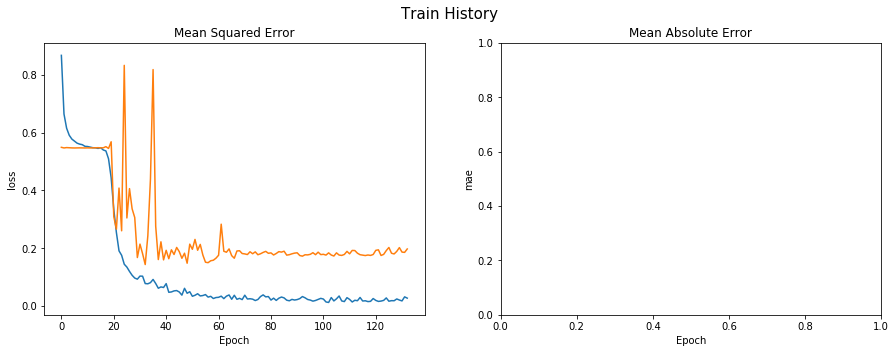

In [99]:
show_training_history(history)

In [23]:
predicted_labels = model.predict(valid_array).reshape(-1).tolist()

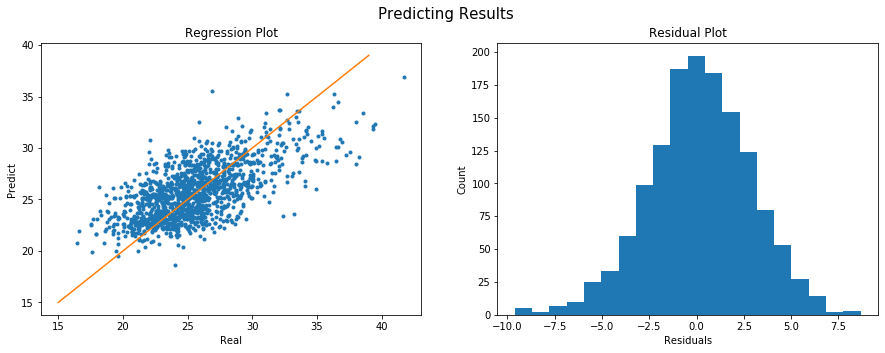

In [25]:
show_predicting_result(valid_labels, predicted_labels)

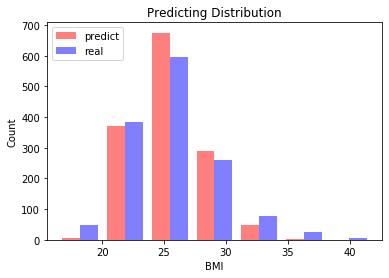

In [26]:
show_predicting_distribution(valid_labels,predicted_labels)

In [27]:
predicted_labels = model.predict(test_array).reshape(-1).tolist()

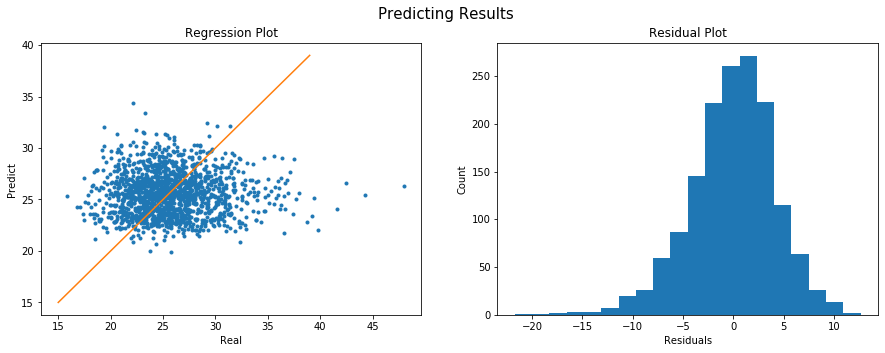

In [29]:
show_predicting_result(test_labels, predicted_labels)
#plt.savefif()

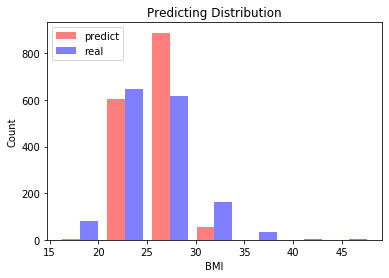

In [30]:
show_predicting_distribution(test_labels,predicted_labels)

In [34]:
[i in test_labels if i < 20 or i >30]

SyntaxError: invalid syntax (<ipython-input-34-9031893136d1>, line 1)

In [80]:
outlier=[i for i in train_labels if i < 20 or i >30]

(array([  1.,   3.,   6.,  11.,  18.,  28.,  43.,  54.,  85., 120., 122.,
         42.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,  19., 186., 165., 141., 129., 106.,  88.,  63.,  62.,  49.,
         52.,  45.,  34.,  31.,  24.,  24.,  28.,  14.,  16.,  11.,  16.,
         11.,   8.,   6.,   8.,   7.,   0.,   2.,   4.,   2.,   4.,   4.,
          1.,   3.,   1.,   2.,   2.,   0.,   0.,   0.,   0.,   1.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([15.21632653, 15.64045729, 16.06458805, 16.48871881, 16.91284956,
        17.33698032, 17.76111108, 18.18524184, 18.6093726 , 19.03350336,
        19.45763411, 19.88176487, 20.30589563, 20.73002639, 21.15415715,
        21.5782879 , 22.00241866, 22.42654942, 22.85068018, 23.27481094,
        23.6989417 , 24.12

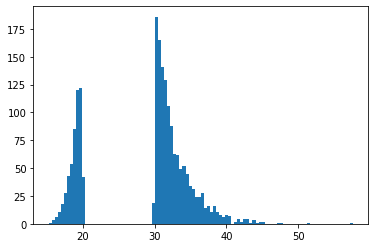

In [81]:
plt.hist(outlier, 100)

In [79]:
from tensorflow.keras import optimizers
from tensorflow.keras import callbacks
model1 = create_linear_dense_model(len(train_array[1]))
model1.compile(optimizer = optimizers.Adam(lr=1e-1), loss='MSE',metrics=['mae'])
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-5, verbose=1)
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=100, verbose=1)
history1 = model1.fit(train_array, train_labels,
                    #sample_weight=sample_weight,
                    validation_data=(np.array(valid_array), np.array(valid_labels)),
                    batch_size= 32, epochs=500, verbose=1,
                    callbacks=[reduce_lr, early_stop])

Epoch 1/500
393/393 [==============================] - 9s 24ms/step - loss: 44.1604 - mae: 4.8958 - val_loss: 14.9159 - val_mae: 2.8720
Epoch 2/500
393/393 [==============================] - 9s 22ms/step - loss: 22.5652 - mae: 3.6795 - val_loss: 13.3536 - val_mae: 2.8838
Epoch 3/500
393/393 [==============================] - 9s 22ms/step - loss: 17.1983 - mae: 3.1686 - val_loss: 12.6765 - val_mae: 2.7237
Epoch 4/500
393/393 [==============================] - 9s 23ms/step - loss: 14.8736 - mae: 2.9363 - val_loss: 12.9448 - val_mae: 2.6934
Epoch 5/500
393/393 [==============================] - 9s 22ms/step - loss: 14.0868 - mae: 2.8507 - val_loss: 12.7549 - val_mae: 2.7555
Epoch 6/500
393/393 [==============================] - 8s 22ms/step - loss: 13.9061 - mae: 2.8368 - val_loss: 12.6972 - val_mae: 2.7358
Epoch 7/500
393/393 [==============================] - 9s 22ms/step - loss: 13.9148 - mae: 2.8375 - val_loss: 12.6836 - val_mae: 2.6897
Epoch 8/500
393/393 [===========================

393/393 [==============================] - 9s 22ms/step - loss: 3.9382 - mae: 1.4668 - val_loss: 7.0390 - val_mae: 2.0722
Epoch 59/500
393/393 [==============================] - 9s 23ms/step - loss: 3.8850 - mae: 1.4756 - val_loss: 6.9998 - val_mae: 2.0694
Epoch 60/500
393/393 [==============================] - 9s 23ms/step - loss: 3.8784 - mae: 1.4671 - val_loss: 7.1764 - val_mae: 2.1005
Epoch 61/500
393/393 [==============================] - 9s 23ms/step - loss: 3.9729 - mae: 1.4783 - val_loss: 7.0722 - val_mae: 2.0832
Epoch 62/500
392/393 [============================>.] - ETA: 0s - loss: 3.9235 - mae: 1.4633
Epoch 00062: ReduceLROnPlateau reducing learning rate to 0.0062500000931322575.
393/393 [==============================] - 9s 23ms/step - loss: 3.9252 - mae: 1.4638 - val_loss: 7.1423 - val_mae: 2.0919
Epoch 63/500
393/393 [==============================] - 9s 22ms/step - loss: 3.7829 - mae: 1.4447 - val_loss: 7.1121 - val_mae: 2.0903
Epoch 64/500
393/393 [=====================

Epoch 113/500
393/393 [==============================] - 9s 22ms/step - loss: 3.4951 - mae: 1.3791 - val_loss: 7.3610 - val_mae: 2.1295
Epoch 114/500
393/393 [==============================] - 9s 22ms/step - loss: 3.4472 - mae: 1.3696 - val_loss: 7.3744 - val_mae: 2.1316
Epoch 115/500
393/393 [==============================] - 9s 22ms/step - loss: 3.4332 - mae: 1.3738 - val_loss: 7.3470 - val_mae: 2.1268
Epoch 116/500
393/393 [==============================] - 9s 22ms/step - loss: 3.4832 - mae: 1.3741 - val_loss: 7.3571 - val_mae: 2.1285
Epoch 117/500
393/393 [==============================] - 9s 22ms/step - loss: 3.4443 - mae: 1.3681 - val_loss: 7.4334 - val_mae: 2.1407
Epoch 118/500
393/393 [==============================] - 9s 22ms/step - loss: 3.4232 - mae: 1.3572 - val_loss: 7.3610 - val_mae: 2.1292
Epoch 119/500
393/393 [==============================] - 9s 22ms/step - loss: 3.4329 - mae: 1.3623 - val_loss: 7.3401 - val_mae: 2.1253
Epoch 120/500
393/393 [=========================

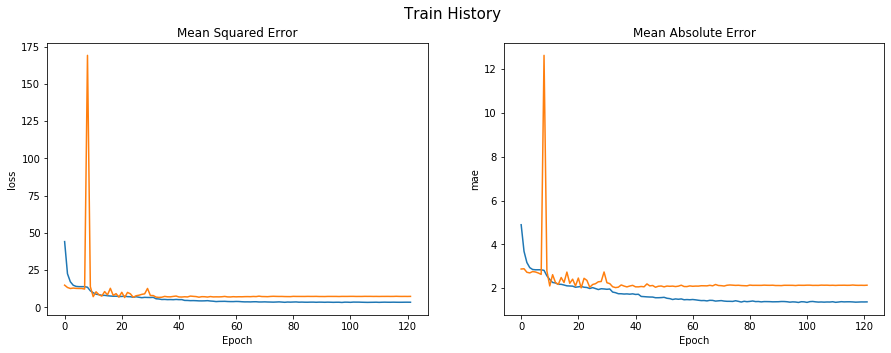

In [82]:
show_training_history(history1)

In [83]:
predicted_labels = model1.predict(valid_array).reshape(-1).tolist()

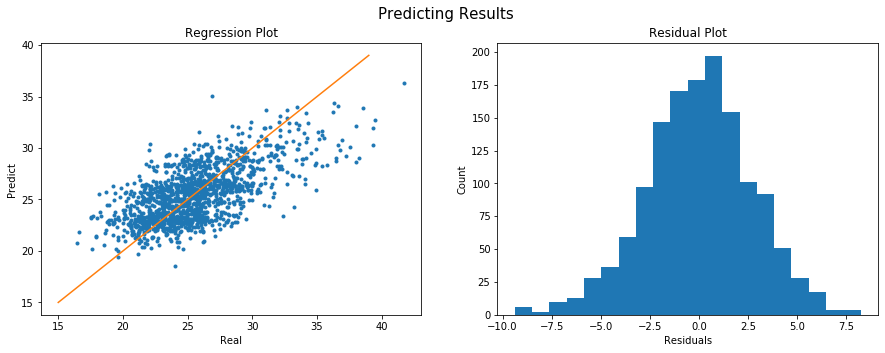

In [84]:
show_predicting_result(valid_labels, predicted_labels)

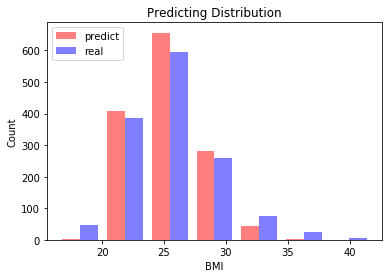

In [85]:
show_predicting_distribution(valid_labels,predicted_labels)

In [86]:
predicted_labels = model1.predict(test_array).reshape(-1).tolist()

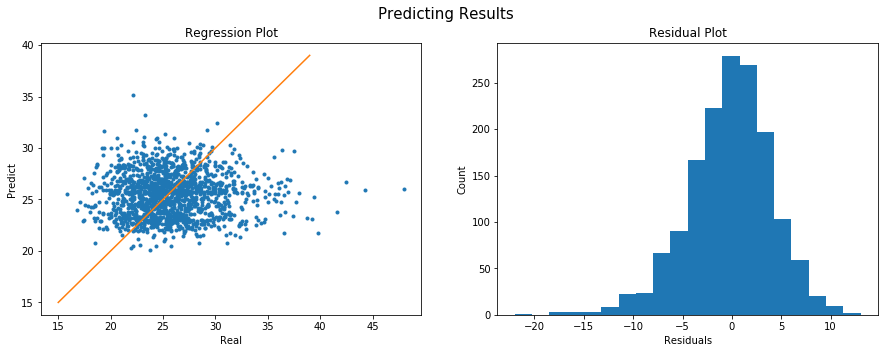

In [87]:
show_predicting_result(test_labels, predicted_labels)
#plt.savefif()

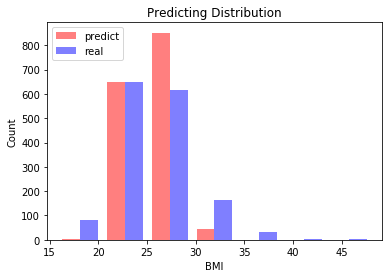

In [88]:
show_predicting_distribution(test_labels,predicted_labels)

In [32]:
from obesity.model_evaluation import show_train_history, metric_array

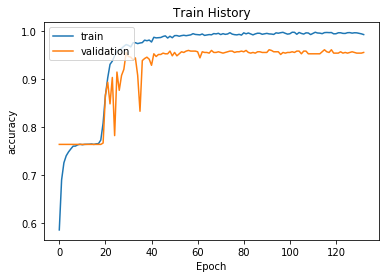

In [33]:
show_train_history(history, 'accuracy', 'val_accuracy')

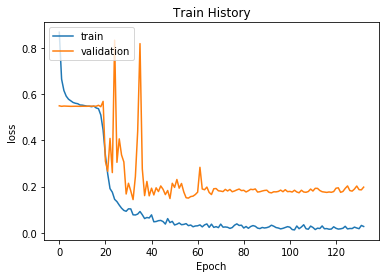

In [34]:
show_train_history(history, 'loss', 'val_loss')

In [183]:
metric_array(valid_array, valid_labels_binary, model)

[0.9662447257383966,
 0.9411764705882353,
 0.9056603773584906,
 0.9836956521739131,
 0.923076923076923,
 0.9017391800420749]

In [184]:
metric_array(test_array, test_labels_binary, model)

[0.6527777777777778,
 0.07692307692307693,
 0.07142857142857142,
 0.7931034482758621,
 0.07407407407407408,
 -0.13938530462494111]

In [37]:
test_labels_binary

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1])

In [38]:
model.predict(test_array)

array([[1.7519780e-03],
       [3.8695877e-04],
       [1.8929059e-03],
       [8.2860753e-04],
       [1.0055763e-03],
       [4.3043174e-04],
       [9.0352731e-04],
       [4.5506621e-04],
       [5.5764555e-03],
       [4.7456103e-04],
       [1.2298075e-03],
       [1.0319453e-03],
       [8.2764647e-04],
       [1.3831048e-03],
       [8.0432696e-04],
       [6.3447002e-04],
       [9.5786189e-04],
       [1.5002576e-03],
       [6.9749012e-04],
       [3.6676697e-04],
       [9.7620988e-04],
       [4.4532839e-04],
       [6.6270598e-04],
       [9.3726773e-04],
       [4.2904195e-04],
       [9.3276846e-01],
       [5.0397502e-04],
       [4.2188144e-04],
       [5.4438808e-04],
       [7.2587299e-04],
       [3.7189934e-04],
       [4.7270977e-04],
       [5.4690376e-04],
       [9.6321839e-04],
       [8.7658465e-02],
       [4.7687328e-04],
       [7.8775775e-01],
       [7.4734393e-04],
       [3.3884920e-04],
       [7.9358881e-04],
       [8.5149828e-04],
       [9.922715

In [80]:
test_array.shape

(72, 9939)

In [44]:
array.shape

(7176, 9939)

In [46]:
pca.fit(array,10)

PCA(n_components=2)

In [59]:
labels[-1]

2

In [86]:
X_p = pca.fit(array).transform(array) 



In [85]:
array.shape

(7176, 109329)

In [84]:
array = tf.keras.utils.to_categorical(array).reshape(len(array),-1)

No handles with labels found to put in legend.


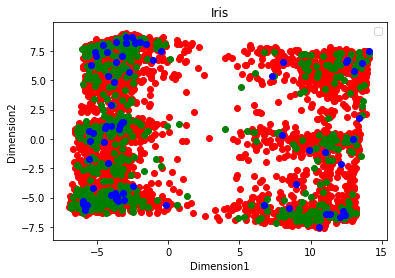

In [87]:
ax = plt.figure() 
for c, i in zip('rgb', [0, 1,2]): 
    plt.scatter(X_p[labels==i,0], X_p[labels==i, 1], c=c) 
plt.xlabel('Dimension1') 
plt.ylabel('Dimension2') 
plt.title('Iris') 
plt.legend() 
plt.show()

In [100]:
model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 9939)]            0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 9939, 8)           88        
_________________________________________________________________
flatten_2 (Flatten)          (None, 79512)             0         
_________________________________________________________________
dense_22 (Dense)             (None, 64)                5088832   
_________________________________________________________________
batch_normalization_20 (Batc (None, 64)                256       
_________________________________________________________________
dropout_20 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 64)               

In [104]:
from tensorflow.keras.models import Model

intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer('batch_normalization_29').output)

In [105]:
intermediate_layer_model.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 9939)]            0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 9939, 8)           88        
_________________________________________________________________
flatten_2 (Flatten)          (None, 79512)             0         
_________________________________________________________________
dense_22 (Dense)             (None, 64)                5088832   
_________________________________________________________________
batch_normalization_20 (Batc (None, 64)                256       
_________________________________________________________________
dropout_20 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 64)               

In [124]:
array = np.concatenate([train_array,valid_array,test_array])


In [128]:
domain_labels = np.array(len(train_array)*[0]+len(valid_array)*[1]+len(test_array)*[2])

In [129]:
pheno_labels = np.concatenate([train_labels,valid_labels,test_labels])

In [125]:
predict_val = intermediate_layer_model.predict(array)

In [126]:
from sklearn import manifold, datasets

In [127]:
X_tsne = manifold.TSNE(n_components=2, init='random', random_state=5, verbose=1).fit_transform(predict_val)

#Data Visualization
x_min, x_max = X_tsne.min(0), X_tsne.max(0)
X_norm = (X_tsne - x_min) / (x_max - x_min)  #Normalize

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7176 samples in 0.106s...
[t-SNE] Computed neighbors for 7176 samples in 0.268s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7176
[t-SNE] Computed conditional probabilities for sample 2000 / 7176
[t-SNE] Computed conditional probabilities for sample 3000 / 7176
[t-SNE] Computed conditional probabilities for sample 4000 / 7176
[t-SNE] Computed conditional probabilities for sample 5000 / 7176
[t-SNE] Computed conditional probabilities for sample 6000 / 7176
[t-SNE] Computed conditional probabilities for sample 7000 / 7176
[t-SNE] Computed conditional probabilities for sample 7176 / 7176
[t-SNE] Mean sigma: 0.001935
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.882652
[t-SNE] KL divergence after 1000 iterations: 0.407773


In [162]:
domain_color_dict = {0:'red',1:'blue',2:'green'}
domain_colors = [domain_color_dict[l] for l in domain_labels]

No handles with labels found to put in legend.


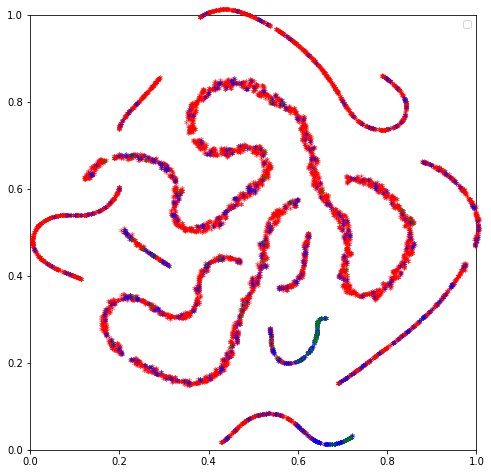

In [163]:
plt.figure(figsize=(8, 8))
for i in range(X_norm.shape[0]):
    plt.text(X_norm[i, 0], X_norm[i, 1], s='*',color=domain_colors[i])
plt.show()

In [165]:
pheno_color_dict = {1:'red',2:'blue'}
pheno_colors = [pheno_color_dict[l] for l in pheno_labels]

No handles with labels found to put in legend.


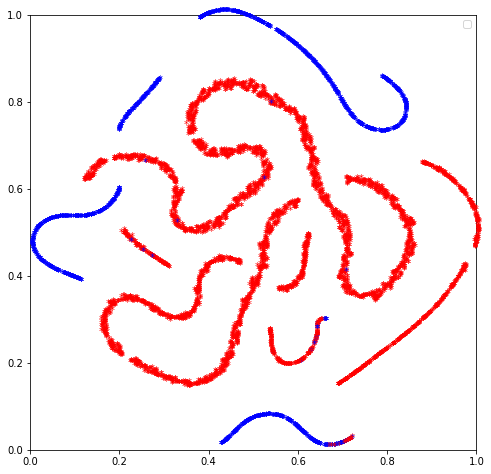

In [167]:
plt.figure(figsize=(8, 8))
for i in range(X_norm.shape[0]):
    plt.text(X_norm[i, 0], X_norm[i, 1], s='*',color=pheno_colors[i])
plt.legend()
plt.show()